1) Normalidad: Los datos deben parecerse a una distribución normal. Si resolvemos la normalidad evitamos otros problemas, como la homocedasticidad.

2) Homocedasticidad: La homocedasticidad se refiere a la suposición de que las variables dependientes tienen el mismo nivel de varianza en todo el rango de las variables predictoras. Es deseable porque queremos que el término de error sea el mismo en todos los valores de las variables independientes.

3) Linealidad: Miramos los diagramas de dispersión y buscar patrones lineales. Si los patrones no son lineales, conviene realizar las transformaciones a los datos. transformaciones de datos.

4) Ausencia de errores
correlacionados - Ocurre en series temporales. Valores correlacionados con el tiempo.

In [37]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as plt

from sklearn.impute import SimpleImputer

from sklearn.impute import KNNImputer

import matplotlib.pyplot as pltpy

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler

1. Carga el dataset “train_housing_prices.csv”. Abajo estan explicadas las variables.

In [38]:
df = pd.read_csv("train_housing_prices.csv")

2. Missings. Primero vamos a realizar el tratamiento de missings:

a. Observa el % de missings y el tipo de cada variable del dataframe.

b. Elimina aquellas variables con más de un 80% de missings

c. Imputa los missings de las variables categóricas a la categoría “Missing” en
cada variable.

d. Imputa los missings de las variables continuas a la media de cada variable.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [40]:
columns_perc = df.isnull().sum()/len(df)*100
columns_perc

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [41]:
columns_perc[columns_perc>80]

Alley          93.767123
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

In [42]:
df2 = df.copy()
df2 = df2.drop(columns=columns_perc[columns_perc>80].index.values)
df.shape==df2.shape

False

In [43]:
lista_numericos = df2._get_numeric_data().columns
lista_numericos

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [44]:
df_cat = df2.drop(columns=lista_numericos)
df_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [45]:
imputer = SimpleImputer (missing_values=np.nan, strategy='constant', fill_value='Missing')
df_cat_imp = imputer.fit_transform(df_cat)
df_cat_imp

array([['RL', 'Pave', 'Reg', ..., 'Y', 'WD', 'Normal'],
       ['RL', 'Pave', 'Reg', ..., 'Y', 'WD', 'Normal'],
       ['RL', 'Pave', 'IR1', ..., 'Y', 'WD', 'Normal'],
       ...,
       ['RL', 'Pave', 'Reg', ..., 'Y', 'WD', 'Normal'],
       ['RL', 'Pave', 'Reg', ..., 'Y', 'WD', 'Normal'],
       ['RL', 'Pave', 'Reg', ..., 'Y', 'WD', 'Normal']], dtype=object)

In [46]:
df_cat = pd.DataFrame(df_cat_imp, columns=df_cat.columns)
df_cat

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Missing,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Gd,Typ,Missing,Attchd,Unf,TA,TA,Y,WD,Normal


In [47]:
df_num = df2[lista_numericos]
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [48]:
imputer = SimpleImputer (missing_values=np.nan, strategy="mean")
imputer.fit(df_num)
df_num_imp = imputer.transform(df_num)
df_num_imp

array([[1.00000e+00, 6.00000e+01, 6.50000e+01, ..., 2.00000e+00,
        2.00800e+03, 2.08500e+05],
       [2.00000e+00, 2.00000e+01, 8.00000e+01, ..., 5.00000e+00,
        2.00700e+03, 1.81500e+05],
       [3.00000e+00, 6.00000e+01, 6.80000e+01, ..., 9.00000e+00,
        2.00800e+03, 2.23500e+05],
       ...,
       [1.45800e+03, 7.00000e+01, 6.60000e+01, ..., 5.00000e+00,
        2.01000e+03, 2.66500e+05],
       [1.45900e+03, 2.00000e+01, 6.80000e+01, ..., 4.00000e+00,
        2.01000e+03, 1.42125e+05],
       [1.46000e+03, 2.00000e+01, 7.50000e+01, ..., 6.00000e+00,
        2.00800e+03, 1.47500e+05]])

In [49]:
df_num2 = pd.DataFrame(df_num_imp, columns=df_num.columns)
df_num2.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


3. Análisis variable respuesta: La variable respuesta es SalePrice, precio de venta.

a. Describe la variable, verifica que no tenga valores negativos y analiza la
distribución empírica (histograma).

b. ¿Cumple las características de una distribución normal?

* i. ¿Está centrada?

* ii. ¿Dónde se acumulan la mayor parte de los valores?

* iii. ¿Las colas son iguales?

c. Piensa y busca qué transformación simple se puede aplicar para conseguir una
variable más parecida a una normal (raíz cuadrada, potencia al cuadrado,
exponencial, logaritmo...?). Aplica la transformación y verifica que la nueva
distribución se parece más a una normal. Continua todo el análisis con la
variable SalePrice transformada.

In [50]:
len(df_num2.SalePrice[df_num.SalePrice<0])==0

True

In [51]:
df_final = pd.concat([df_cat, df_num2], axis=1)
df_final

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,175000.0
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,210000.0
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,266500.0
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,142125.0


In [52]:
# df_final = pd.get_dummies(df_final, drop_first=True, dtype=int)
# df_final

In [53]:
# from sklearn.preprocessing import StandardScaler
# objeto_escalador = StandardScaler()
# objeto_escalador.fit(df_final)

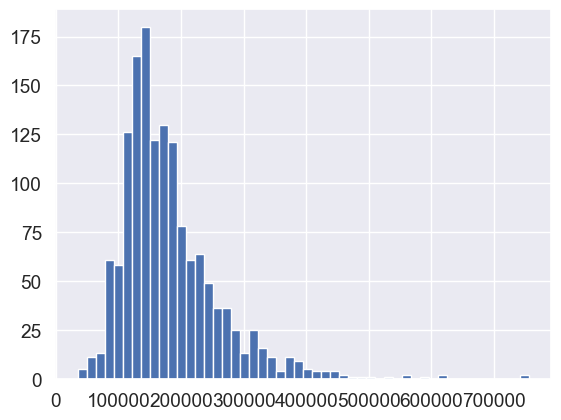

In [54]:
pltpy.hist(df_final.SalePrice.values, bins=50)
pltpy.show()

* i. ¿Está centrada?
No

* ii. ¿Dónde se acumulan la mayor parte de los valores?
En la parte izquierda de la distribución

* iii. ¿Las colas son iguales?
No, la cola izquierda es más corta que la cola derecha

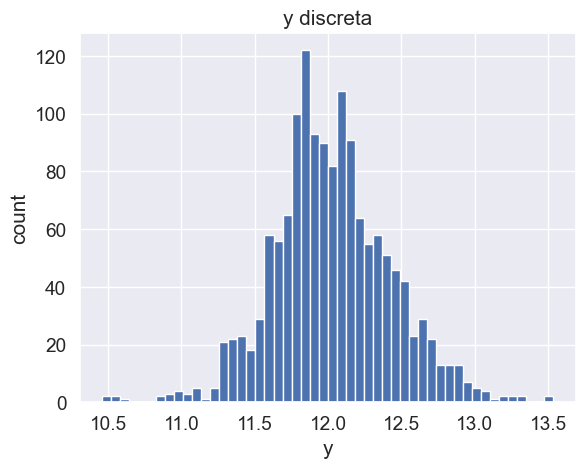

In [55]:
pltpy.hist(np.log(df_final.SalePrice.values), 50)
pltpy.xlabel("y")
pltpy.ylabel("count")
pltpy.title("y discreta")
pltpy.show()

4. Análisis gráfico y transformación de variables: Ahora vamos a realizar el análisis
gráfico de las 9 variables que están más correlacionadas con SalePrice. Al final de los
enunciados hay un codigo que podéis utilizar. Para cada variable:

a. Gráfica la distribución/histograma y verifica el tipo de variable. Algunas variables
categóricas vienen como tipo continuo.

b. Si son variables categóricas, verifica si es posible unificar categorías. Para ello
realiza el análisis bivariante con los gráficos boxplot de cada categoría(con el
target) . [Por ejemplo, puedes agrupar categorías de la variable OverallQual].
Une categorías que tengan una distribución del target parecida.

c. Si son variables continuas, verifica que no tengan outliers (a simple vista). Para
ello realiza el análisis bivariante con el scatter(con el target). [Por ejemplo,
puedes eliminar 2 outliers de la variable GrLivArea]

d. Si son variables continuas, verifica que no tengan demasiada asimetría y en
caso de que tengan demasiada, realiza la transformación log. Para ello observa
la distribución y calcula la skewness(número que indica el nivel de asimetría).
[Por ejemplo, GrLivArea presenta mucha asimetría]
Df.column.skew
https://en.wikipedia.org/wiki/Skewness (skewness=Asímetria)

Código:
 correlacion y mapa de calor
corrmat = X.corr() # X son los datos numericos
sns.heatmap(corrmat, vmax=.8, square=True)
#Ampliación matriz, para variable que se selecciona muestra las k variables más
correlacionadas,Substituye'NOMBREVARIABLE'porelnombredelavariableaestudiar
k=10#numerodevariables
cols=corrmat.nlargest(k,'NOMBREVARIABLE')['NOMBREVARIABLE'].index
cm=np.corrcoef(X[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
yticklabels=cols.values,xticklabels=cols.values)
plt.show()

In [56]:
df_final4 = df_num2.copy()

In [57]:
df_final4["log_SalePrice"] = np.log(df_final.SalePrice)

<Axes: >

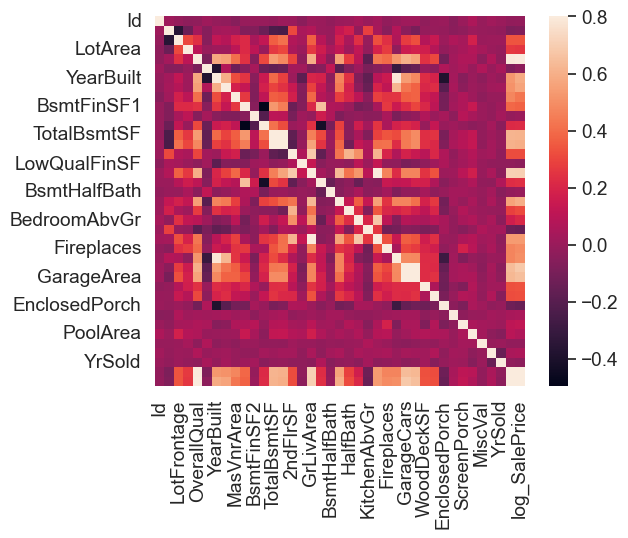

In [58]:
corrmat = df_final4.corr()
sns.heatmap(corrmat, vmax=.8, square=True)
#Ampliación matriz, para variable que se selecciona muestra las k variables más
# correlacionadas,Substituye'NOMBREVARIABLE'porelnombredelavariableaestudiar

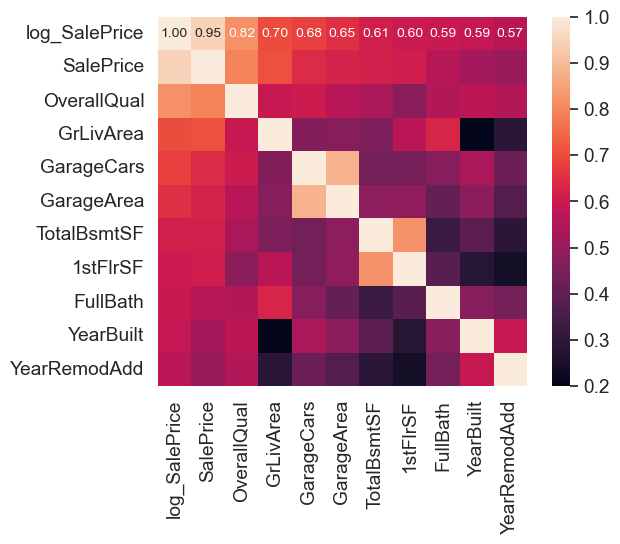

In [59]:
k=11#numerodevariables
cols=corrmat.nlargest(k,'log_SalePrice')['log_SalePrice'].index
cm=np.corrcoef(df_final4[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
yticklabels=cols.values,xticklabels=cols.values)
pltpy.show()

* a. Gráfica la distribución/histograma y verifica el tipo de variable. Algunas variables
categóricas vienen como tipo continuo.

In [60]:
cols = cols.drop(["log_SalePrice", "SalePrice"])
cols

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd'],
      dtype='object')

e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


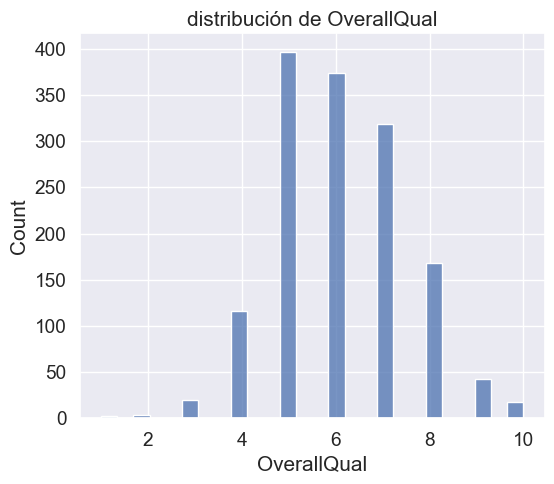

OverallQual es de tipo float64


e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


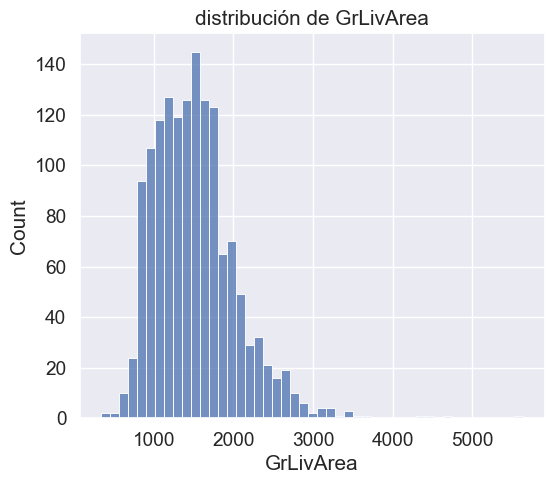

GrLivArea es de tipo float64


e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


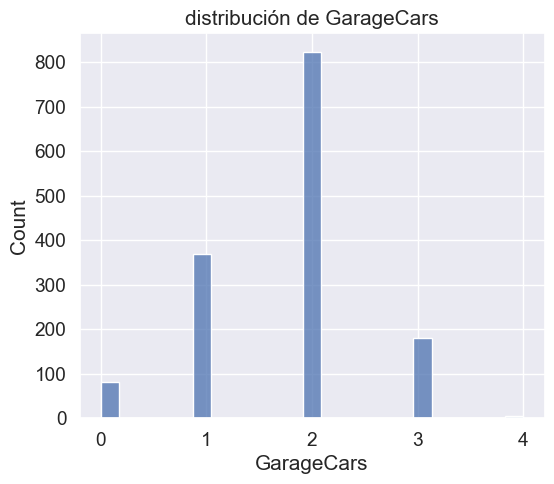

GarageCars es de tipo float64


e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


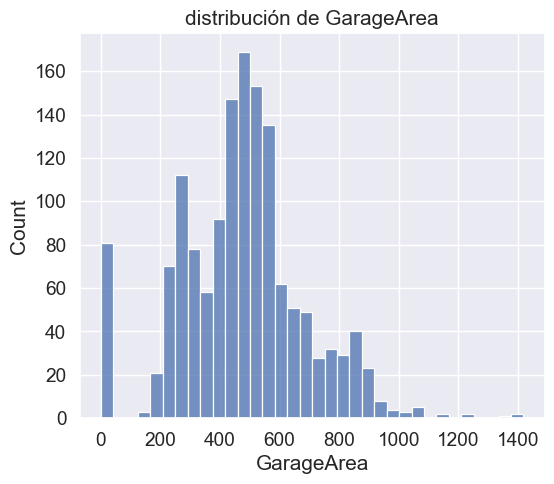

GarageArea es de tipo float64


e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


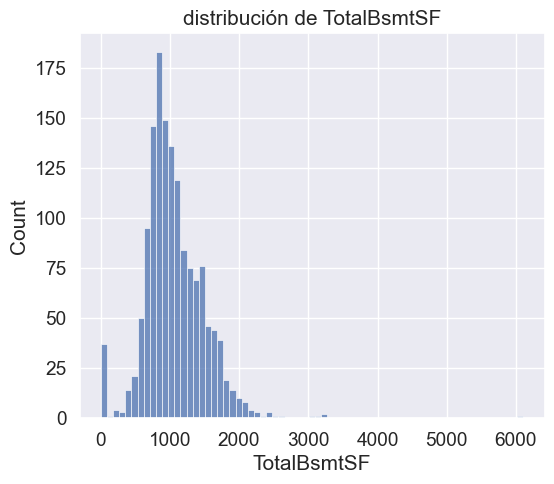

TotalBsmtSF es de tipo float64


e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


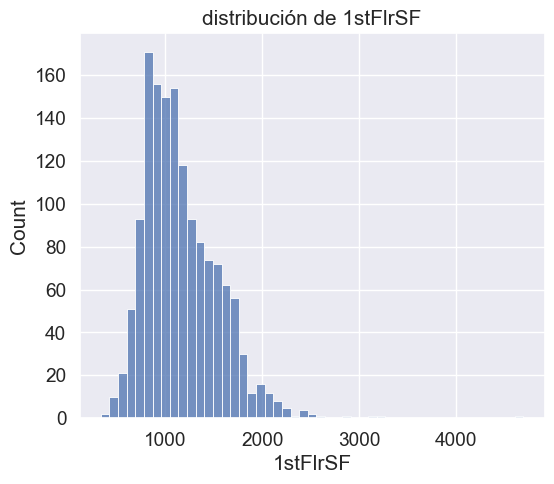

1stFlrSF es de tipo float64


e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


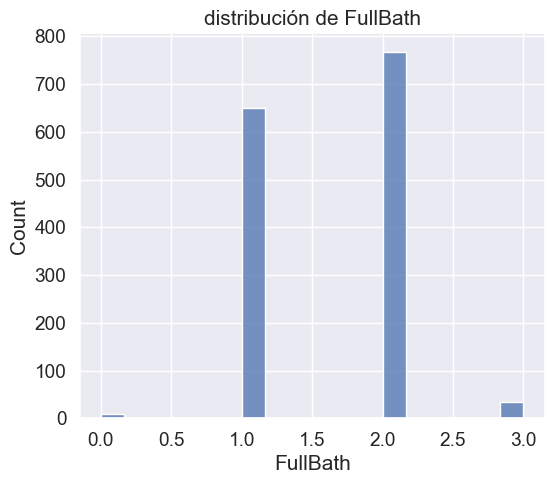

FullBath es de tipo float64


e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


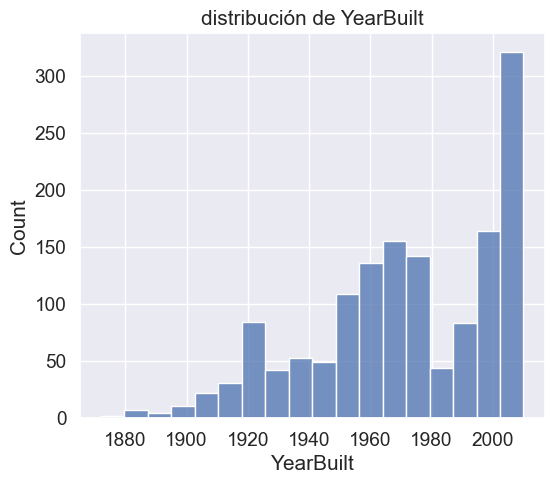

YearBuilt es de tipo float64


e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


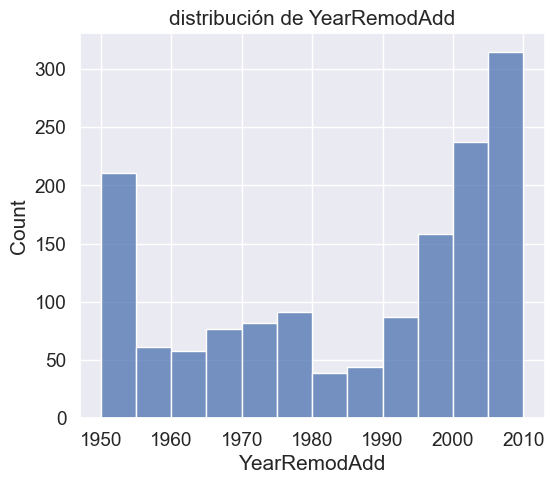

YearRemodAdd es de tipo float64


In [61]:
# for i in cols:
#     sns.histplot(df_num2[i], bins=100)
# pltpy.show()

for var in cols:
    pltpy.figure(figsize=(6,5))
    sns.histplot(df_final4[var])
    pltpy.title(f"distribución de {var}")
    pltpy.show()
    print(f"{var} es de tipo {df_final4[var].dtype}")

In [62]:
# df_final4.info()

* b. Si son variables categóricas, verifica si es posible unificar categorías. Para ello
realiza el análisis bivariante con los gráficos boxplot de cada categoría(con el
target) . [Por ejemplo, puedes agrupar categorías de la variable OverallQual].
Une categorías que tengan una distribución del target parecida.

In [63]:
# bins = np.linspace(min(df_final4["OverallQual"]), max(df_final4["OverallQual"]), 4 )
# pedo usar lo anterior si quiero dividir ytengo claro cuales osn los valores
bins = [0,4,6,8,10]
categorias = ["0-4", "5-6","7-8","8-10"]

pd.cut(df_final4["OverallQual"], bins, labels=categorias)
#cut (serie/columna, los cortes, las categorías)

df_cat["OverallQual_cat"] = pd.cut(df_final4["OverallQual"], bins, labels=categorias)
df_num_4b = df_final4.drop("OverallQual", axis=1)

df_cat_4b = df_cat

* Aqui tienes df_num_4b y df_cat_4b

In [64]:
df_num_4b_bkup = df_num_4b

df_cat_4b_bkup = df_cat_4b

In [65]:
df_num_4b = df_num_4b_bkup

df_cat_4b = df_cat_4b_bkup
# bins = np.linspace(min(df_final4["OverallQual"]), max(df_final4["OverallQual"]), 4 )
# pedo usar lo anterior si quiero dividir ytengo claro cuales osn los valores
bins = [0,0.9,1,3]
categorias = ["0", "1","+1"]

pd.cut(df_num_4b["FullBath"], bins, labels=categorias)
#cut (serie/columna, los cortes, las categorías)

df_cat_4b["FullBath_cat"] = pd.cut(df_num_4b["FullBath"], bins, labels=categorias)
df_num_4b = df_num_4b.drop("FullBath", axis=1)

df_num_4b.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,log_SalePrice
0,1.0,60.0,65.0,8450.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0,12.247694
1,2.0,20.0,80.0,9600.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0,12.109011
2,3.0,60.0,68.0,11250.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0,12.317167
3,4.0,70.0,60.0,9550.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0,11.849398
4,5.0,60.0,84.0,14260.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0,12.429216


In [66]:
df_num_4b_bkup = df_num_4b

df_cat_4b_bkup = df_cat_4b

* c. Si son variables continuas, verifica que no tengan outliers (a simple vista). Para
ello realiza el análisis bivariante con el scatter(con el target). [Por ejemplo,
puedes eliminar 2 outliers de la variable GrLivArea]

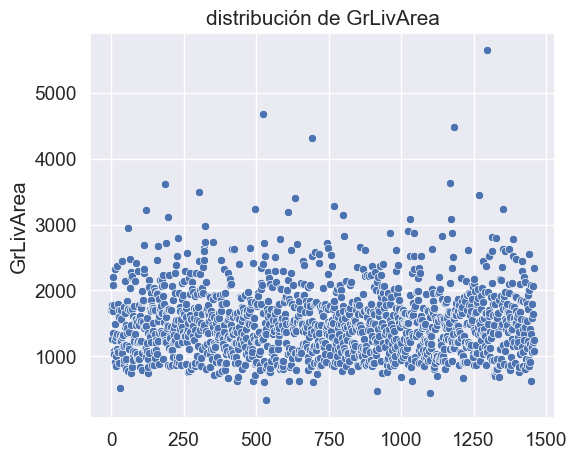

GrLivArea es de tipo float64


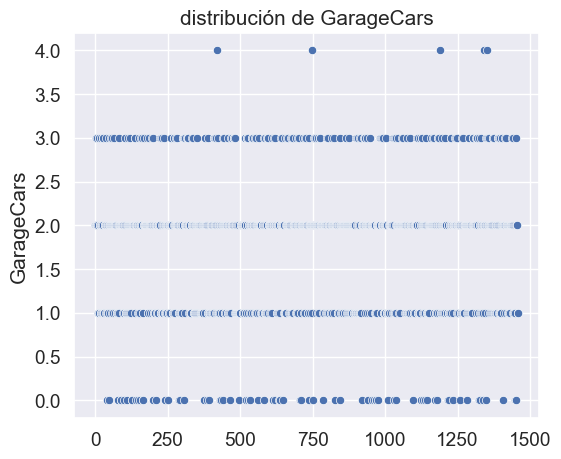

GarageCars es de tipo float64


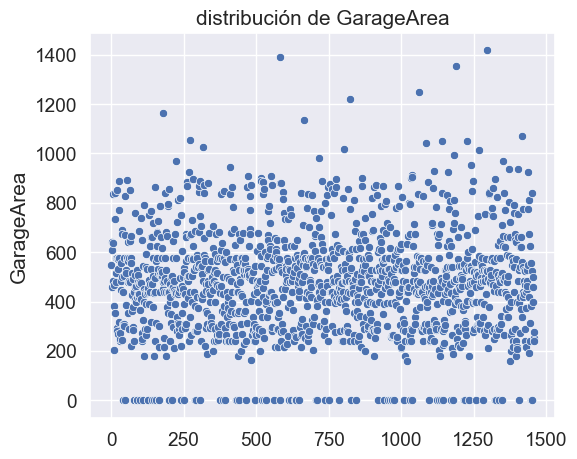

GarageArea es de tipo float64


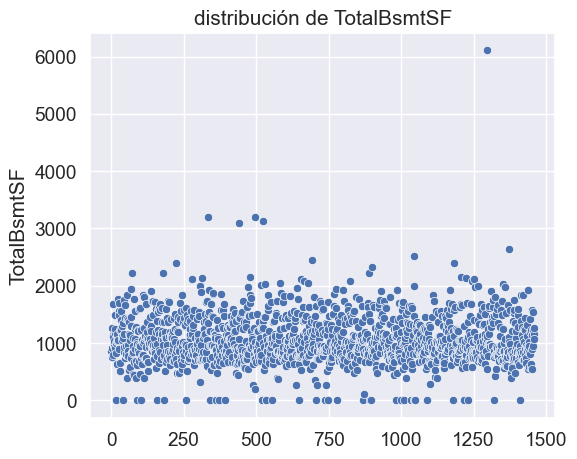

TotalBsmtSF es de tipo float64


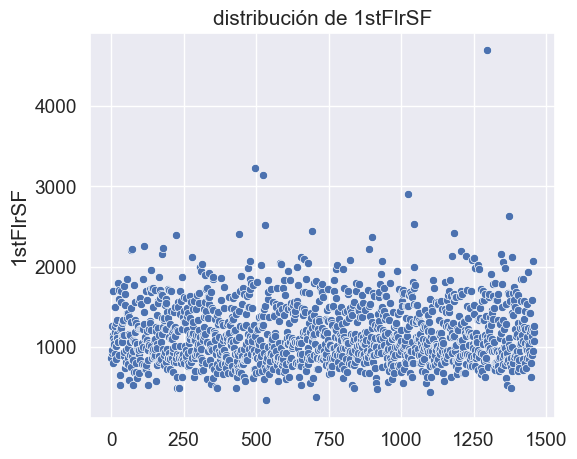

1stFlrSF es de tipo float64


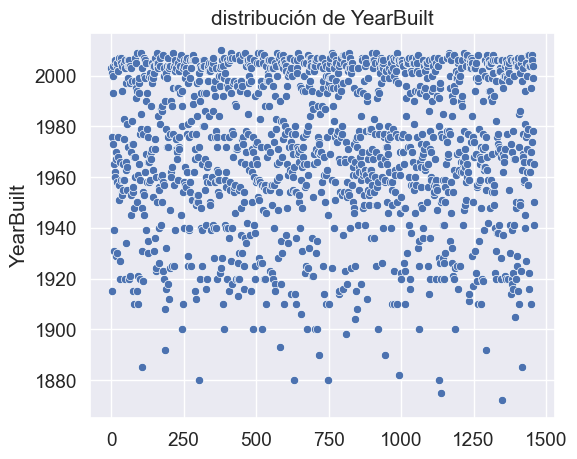

YearBuilt es de tipo float64


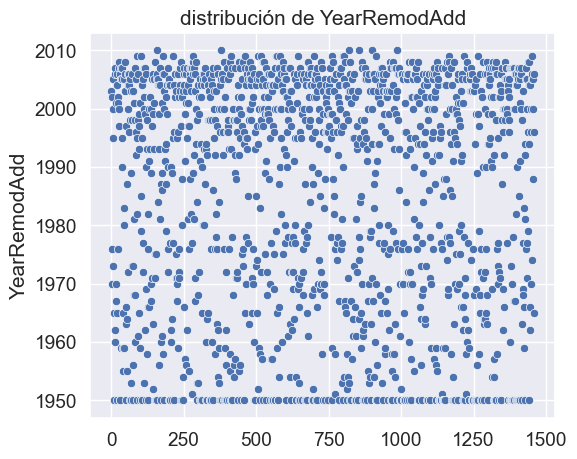

YearRemodAdd es de tipo float64


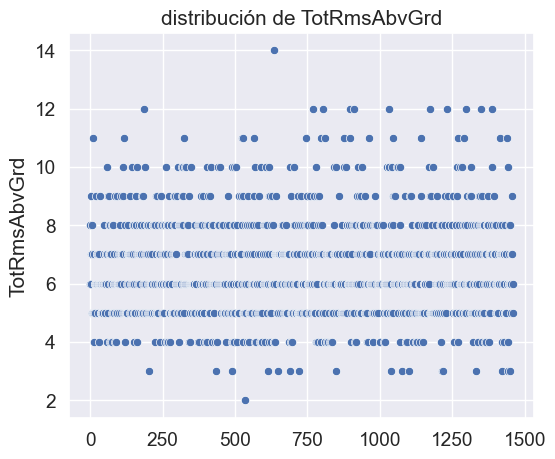

TotRmsAbvGrd es de tipo float64


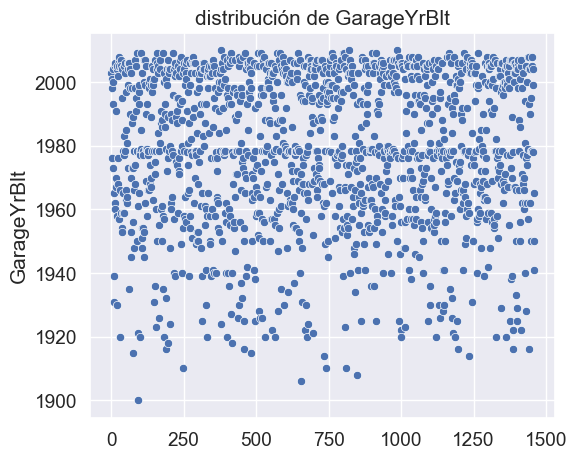

GarageYrBlt es de tipo float64


In [67]:
corrmat = df_num_4b.corr()
k=11
cols=corrmat.nlargest(k,'log_SalePrice')['log_SalePrice'].index
cols = cols.drop(["log_SalePrice", "SalePrice"])

for var in cols:
    pltpy.figure(figsize=(6,5))
    sns.scatterplot(df_final4[var])
    pltpy.title(f"distribución de {var}")
    pltpy.show()
    print(f"{var} es de tipo {df_final4[var].dtype}")

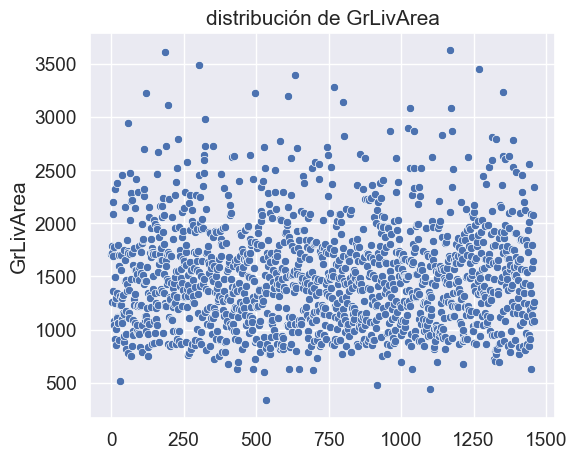

In [68]:
df_num_4b = df_num_4b[df_num_4b.GrLivArea<4000]

pltpy.figure(figsize=(6,5))
sns.scatterplot(df_num_4b["GrLivArea"])
pltpy.title(f"distribución de GrLivArea")
pltpy.show()

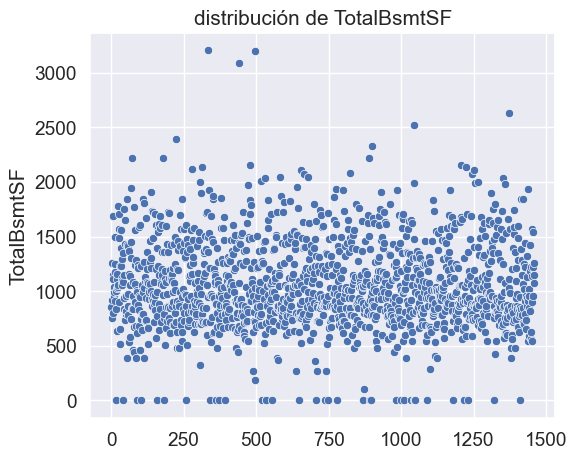

In [69]:
df_num_4b = df_num_4b[df_num_4b.TotalBsmtSF<4000]

pltpy.figure(figsize=(6,5))
sns.scatterplot(df_num_4b["TotalBsmtSF"])
pltpy.title(f"distribución de TotalBsmtSF")
pltpy.show()


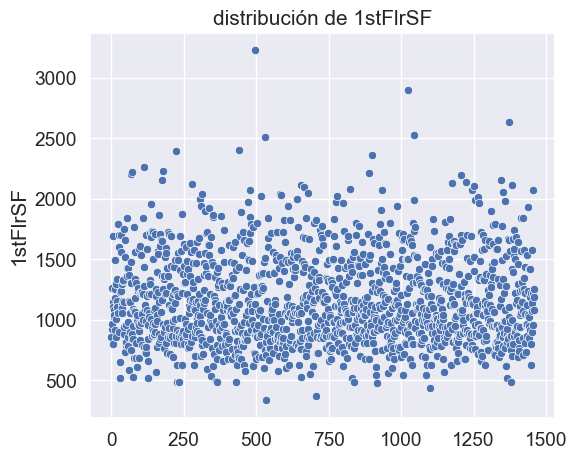

In [70]:
df_num_4b = df_num_4b[df_num_4b["1stFlrSF"]<4000]

pltpy.figure(figsize=(6,5))
sns.scatterplot(df_num_4b["1stFlrSF"])
pltpy.title(f"distribución de 1stFlrSF")
pltpy.show()



* d. Si son variables continuas, verifica que no tengan demasiada asimetría y en
caso de que tengan demasiada, realiza la transformación log. Para ello observa
la distribución y calcula la skewness(número que indica el nivel de asimetría).
[Por ejemplo, GrLivArea presenta mucha asimetría]
Df.column.skew
https://en.wikipedia.org/wiki/Skewness (skewness=Asímetria)